# Collegedata scraping (1)

In [102]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

import requests
import time
from bs4 import BeautifulSoup
import re
import TIdatabase as ti

In [103]:
genderdict = {'Male': -1, 'Female': 1, None: 0}
minoritydict = {'african-american': 1, 'caucasian': -1, 'white': -1, 'hispanic': 1, 'asian': -1, 'european american': -1, 'latina': 1, None: 0}
highschooldict = {'Public': -1, 'Private': 1, 'Parochial': 1, 'Home-Schooled': 1, None: 0}
minoritylist = {'african', 'hispanic', 'latin','indian'}
nonminoritylist = {'white', 'caucasian', 'asian', 'european'}
sats=[1600, 1560, 1510, 1460, 1420, 1380, 1340, 1300, 1260, 1220, 1190, 1150, 1110, 1070, 1030, 990, 950, 910, 870, 
      830, 790, 740, 690, 640, 590, 530]
act2satdict=dict(zip(range(11,37),sats))
booleandict={'': -1, 'X': 1}
statusdict={'Will Attend': 1, 'Accepted': 1, 'Applied': 0, 'Deferred': -1, 'Denied': -1, 'Not Applied': 0, 'Wait-Listed': 1, 'Withdrawn': 0}

In [104]:
def getFromDict(dictionary,text):
    if dictionary.has_key(text):
        return dictionary[text]
    else:
        return 0

In [105]:
def isMinority(text):
    for m in minoritylist:
        if m in text:
            return 1
    for m in nonminoritylist:
        if m in text:
            return -1
    return 0

In [119]:
college_ids=['Princeton', 'Harvard', 'Yale', 'Columbia', 'Stanford', 'UChicago', 'MIT', 'Duke', 'UPenn', 'CalTech', 'JohnsHopkins', 'Dartmouth', 'Northwestern', 'Brown', 'Cornell', 'Vanderbilt', 'WashU', 'Rice', 'NotreDame', 'UCB', 'Emory', 'Georgetown', 'CarnegieMellon', 'UCLA', 'USC']
college_urls=[111, 444, 244, 399, 781, 327, 186, 1026, 67, 706, 1509, 403, 1803, 163, 787, 1562, 1720, 731, 1774, 1090, 1039, 1182, 204, 1093, 1138]
college_id_dict=dict(zip(college_ids,college_urls))
uni_list=['Princeton University', 'Harvard College', 'Yale University', 'Columbia University', 'Stanford University', 'University of Chicago', 'Massachusetts Institute of Technology', 'Duke University', 'University of Pennsylvania', 'California Institute of Technology', 'Johns Hopkins University', 'Dartmouth College', 'Northwestern University', 'Brown University', 'Cornell University', 'Vanderbilt University', 'Washington University in St. Louis', 'Rice University', 'University of Notre Dame', 'University of California, Berkeley', 'Emory Univesrity', 'Georgetown University', 'Carnegie Mellon University', 'University of California, Los Angeles', 'University of Southern California']
uni_name_dict = dict(zip(uni_list, college_ids))
uni_state=['NJ', 'MA', 'CT', 'NY', 'CA', 'IL', 'MA', 'NC', 'PA', 'CA', 'MD', 'NH', 'IL', 'RI', 'NY', 'TN', 'MO', 'TX', 'IN', 'CA', 'GA', 'DC', 'PA', 'CA', 'CA']
states_dict={'Alabama': 'AL',
 'Alaska': 'AK',
 'American Samoa': 'AS',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Guam': 'GU',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'National': 'NA',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Northern Mariana Islands': 'MP',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Puerto Rico': 'PR',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virgin Islands': 'VI',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY',
  'Other': 'Other'}
uni_state_dict = dict(zip(uni_list,uni_state))
baseurl='http://www.collegedata.com/cs/admissions/'
tracker_url='admissions_tracker_result.jhtml?schoolId='
student_url='admissions_profile_view.jhtml?profileName='

In [107]:
## Source: https://impythonist.wordpress.com/2015/01/06/ultimate-guide-for-scraping-javascript-rendered-web-pages/
import sys  
from PyQt4.QtGui import *  
from PyQt4.QtCore import *  
from PyQt4.QtWebKit import *  
from lxml import html 

class Render(QWebPage):  
    def __init__(self, url):  
        self.app = QApplication(sys.argv)  
        QWebPage.__init__(self)  
        self.loadFinished.connect(self._loadFinished)  
        self.mainFrame().load(QUrl(url))  
        self.app.exec_()  
  
    def _loadFinished(self, result):  
        self.frame = self.mainFrame()  
        self.app.quit()
        
    def __del__(self):
        print 'deleting'

In [7]:
schoolurl=baseurl+tracker_url+str(111)+'&classYear='
r=Render(schoolurl+str(2010))
result = r.frame.toHtml()
#print str(result.toAscii())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <title>
   Princeton University Admissions Results for Class of 2010
  </title>
  <!-- AT Results (Admissions Tracker Results) page configuration start -->
  <meta content="Princeton University Admissions Results for Class of 2010" name="title">
   <meta content="See who got in, who didn't and how you compare at Princeton University, and get an inside look at students applying this year. View each student's college list, qualifications, and admissions decisions. Add your Profile and use the scattergrams to see where you stand." name="description">
    <link href="http://www.collegedata.com/cs/page/images/admissions/logindemo_scattergram_1.gif" rel="image_src">
     <meta content="Princeton University Admissions Results for Class of 2010" property="og:title">
      <meta content="See who got in, who didn't and how
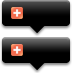
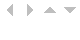

In [8]:
soup = BeautifulSoup(str(result.toAscii()),'html.parser')
#r = requests.get(schoolurl+str(2009))
#time.sleep(3)
#soup = BeautifulSoup(r.text,'html.parser')
print soup.prettify()
#rows = soup.find(id="profilewrap") #.find(id='tableBodyWrap').find_all("tr")[1:]
#print rows

In [9]:
profiles= soup.find_all("a",href=re.compile(r"enterProfileByName"))
profileList=set()
for p in profiles:
    profileList.add(p.get("href").split("'")[1])
print len(profileList)

44


In [108]:
columns_student = ['classrank', 'admissionstest','AP','averageAP','SATsubject', 'GPA', 'program','schooltype',
            'intendedgradyear', 'canAfford', 'female', 'MinorityGender','MinorityRace','international',
           'firstinfamily','sports','artist', 'workexp']
columns_uni = ['collegeID','earlyAppl','visited','alumni', 'outofstate', 'acceptStatus','acceptProb']

In [130]:
#p=list(profileList)[12]
#p='3q9x4'
#p='meggymack92'
p='6FNsQ'
profile_url=baseurl+student_url+p
print profile_url
soup=BeautifulSoup(requests.get(profile_url).text,'html.parser')
#print columns
print getColumnValues(soup)

http://www.collegedata.com/cs/admissions/admissions_profile_view.jhtml?profileName=6FNsQ
1
({'intendedgradyear': 2010, 'classrank': None, 'canAfford': None, 'schooltype': -1, 'artist': None, 'MinorityGender': None, 'averageAP': 3.5, 'admissionstest': 730, 'GPA': 3.7, 'sports': 1, 'AP': 2, 'program': u'undecided', 'female': -1, 'workexp': None, 'international': -1, 'MinorityRace': -1, 'SATsubject': 3, 'firstinfamily': None}, [{'acceptStatus': 1, 'alumni': -1, 'earlyAppl': -1, 'outofstate': 1, 'visited': None, 'collegeID': 'Princeton'}])


In [109]:
def getScores(scores,fun):
    scores = [s.get_text().strip() for s in scores]
    while '' in scores:
        scores.remove('')
    if len(scores)>0:
        scores=[int(s) for s in scores]
        return fun(scores), len(scores)
    else:
        return None, 0
def getAdmissionTestScore(doc):
    satCRM,dummy = getScores(doc[0:2],sum)
    satW,dummy = getScores([doc[2]],np.max)
    act,dummy = getScores([doc[4]],np.max)
    if act == None:
        return (satCRM+satW)/3
    elif satCRM==None or satW==None:
        return act2satdict[act]/2
    else:
        return ((act2satdict[act]+satCRM)/2+satW)/3

In [131]:
def getColumnValues(soup):
    values=[None for i in range(18)]
    applications=[]
    # We start with the general information box at the top which includes class year, gender and ethnicity
    doc= soup.find("div",{"class": "general"})
    values[8] = int(re.findall(r'\d{4}',doc.find("h1").get_text().split('Class of')[-1])[0]) # CLASS YEAR
    doc = doc.find_all("span")
    values[10]= getFromDict(genderdict,doc[0].get_text().strip()) # GENDER
    values[12] = isMinority(doc[1].get_text().strip().lower()) # MINORITY RACE
    values[6] = doc[2].get_text().strip() # PROGRAM
    # Now we look at the academics box which includes GPA and high school info
    doc = soup.find("div", {"class": "academicswrap"}).find_all("span")
    values[7]=getFromDict(highschooldict,doc[0].get_text().strip()) # SCHOOL TYPE
    state=states_dict[doc[1].get_text().strip()] # STATE OF STUDENT
    values[13] = 1 if state=='Other' else -1
    values[5] = float(doc[3].get_text()) # This is the unweighted GPA, to get weighted, change to doc[4]
    # Next, we go to the test score box which includes SAT, ACT and AP info
    values[1] = getAdmissionTestScore(soup.find("div", {"class": "testscorewrap"}).find_all("td")) #Admissions test
    values[4] = len(soup.find("caption",text="SAT Subject Test Scores").next_sibling.next_sibling.find_all("tr")) # SAT SUBJECT
    ap_num = len(soup.find("caption",text="AP Examinations").next_sibling.next_sibling.find_all("tr"))
    values[2]=ap_num #AP
    if ap_num>0:
        doc = soup.find("caption",text="AP Examinations").next_sibling.next_sibling.find_all("td")
        values[3],values[2]= getScores(doc,np.mean) # AVERAGE AP
    # Next: the colleges applied to and the admission results for the admissions table
    doc = soup.find("table", {"class": "collchoice"})
    collegelist = doc.find_all("tr")[2:]
    for c in collegelist:
        uni = c.find("th").get_text().strip()
        if uni in uni_list:
            unirow = [None for i in range(6)]
            unirow[0]=uni_name_dict[uni]
            doc=c.find_all("td", {"class": "center"})
            unirow[1]=booleandict[doc[0].get_text().strip()] # Early Admission
            unirow[3]=booleandict[doc[1].get_text().strip()] # Alumni/Legacy
            if values[15]==None or values[16]==0: 
                values[15]=booleandict[doc[2].get_text().strip()] # Athlete
            doc = doc[2].next_sibling.find_next("span")
            unirow[5]=statusdict[doc.get_text().strip()] # Admission status
            if values[9]==None or values[9]==0:
                finaid=-1 if 'Yes' in doc.find_next("span").get_text().strip() else 0
            unirow[4]= -1 if state==uni_state_dict[uni] else 1
            applications.append(dict(zip(columns_uni,unirow)))
    return dict(zip(columns_student,values)), applications

In [132]:
if ('students' in locals()): 
    students.cleanup()
    del students
if ('applForm' in locals()): del applForm
students=ti.Student()
colleges = ti.College()
applForm = ti.ApplForm()
for p in profileList:
    #print p
    profile_url=baseurl+student_url+p
    soup=BeautifulSoup(requests.get(profile_url).text,'html.parser')
    newrow, applications = getColumnValues(soup)
    studentID=students.insert(newrow)
    for app in applications:
        app['studentID']=studentID[0]
    applForm.insert(applications)
students.df

,studentID,classrank,admissionstest,AP,averageAP,SATsubject,GPA,program,schooltype,intendedgradyear,canAfford,female,MinorityGender,MinorityRace,international,firstinfamily,sports,artist,workexp
0,L5AH1F4ULQ,None,743,0,None,3,3.94,Government,-1,2010,None,-1,None,-1,-1,None,-1,None,None
0,IW7YDNYCBO,None,593,0,None,3,3.00,Accouting,-1,2010,None,1,None,1,-1,None,-1,None,None
0,QXXUBIASYV,None,783,4,5,4,3.90,Economics,1,2010,None,-1,None,-1,-1,None,-1,None,None
0,GSEY115AXJ,None,713,3,3,3,3.80,English/Anthropology,-1,2010,None,1,None,-1,-1,None,-1,None,None
0,XFHE7WAXO3,None,626,1,3,3,3.45,Biochemistry,-1,2010,None,1,None,1,-1,None,-1,None,None
0,YXG4S87RB5,None,783,4,4.75,4,3.90,Neuroscience,-1,2010,None,-1,None,-1,-1,None,-1,None,None
0,ZVGYNN9DFH,None,746,3,4.666667,3,3.91,history,-1,2010,None,1,None,-1,-1,None,-1,None,None
0,UYZF73K30E,None,786,7,5,5,4.00,Engineering,-1,2010,None,-1,None,-1,-1,None,-1,None,None
0,9DKWQGEWBV,None,740,2,4,4,4.00,Environmental Engineering,-1,2010,None,1,None,-1,-1,None,-1,None,None
0,040BTUXIMA,None,580,3,3.333333,3,3.91,Pre-Med/Econ,-1,2010,None,-1,None,-1,-1,None,-1,None,None


In [133]:
applForm.df

,studentID,collegeID,earlyAppl,visited,alumni,outofstate,acceptStatus,acceptProb
0,L5AH1F4ULQ,Princeton,-1,None,-1,1,1,NaN
1,L5AH1F4ULQ,Yale,-1,None,-1,1,-1,NaN
2,L5AH1F4ULQ,Columbia,-1,None,-1,1,1,NaN
3,L5AH1F4ULQ,Harvard,-1,None,1,1,1,NaN
4,L5AH1F4ULQ,Cornell,-1,None,-1,1,-1,NaN
5,L5AH1F4ULQ,UCB,-1,None,-1,1,1,NaN
6,L5AH1F4ULQ,UCLA,-1,None,-1,1,1,NaN
7,L5AH1F4ULQ,Georgetown,-1,None,-1,1,1,NaN
0,IW7YDNYCBO,UPenn,-1,None,-1,1,-1,NaN
1,IW7YDNYCBO,Princeton,-1,None,-1,1,-1,NaN
